In [6]:
import numpy as np
from scipy.signal import medfilt
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
with open('C:\\Users\\ru\\Documents\\git\\spm_data_analysis\\new_pic_w_avg_phase\\amp.txt', 'r') as file:
    matrix = np.loadtxt(file)
vals = matrix.flatten()
med = np.median(vals)
mean = vals.mean()
deviation = vals.std()
#vals[np.where(np.logical_or(vals > mean + 2 * deviation, vals < mean - 2 * deviation))] = med
vals[np.where(np.logical_or(vals > mean + 0.1*deviation, vals < mean - 0.1*deviation))] = min(vals)
with open('C:\\Users\\ru\\Documents\\git\\spm_data_analysis\\filt_result\\amp.txt', 'w') as file:
    file.write('\n'.join(['\t'.join(map(str,line)) for line in np.reshape(vals, (200, 200))]))

In [17]:
with open('C:\\Users\\ru\\Documents\\git\\spm_data_analysis\\filt_result\\amp1.txt', 'w') as file:
    file.write('\n'.join(['\t'.join(map(str,line)) for line in np.reshape(medfilt(matrix.flatten()), (200, 200))]))

In [2]:
amp_matrix = np.loadtxt('C:\\Users\\ru\\Documents\\git\\spm_data_analysis\\new_pic_w_avg_phase\\amp.txt')
freq_matrix = np.loadtxt('C:\\Users\\ru\\Documents\\git\\spm_data_analysis\\new_pic_w_avg_phase\\freq.txt')
qual_matrix = np.loadtxt('C:\\Users\\ru\\Documents\\git\\spm_data_analysis\\new_pic_w_avg_phase\\qual.txt')

4.13030563742e-13


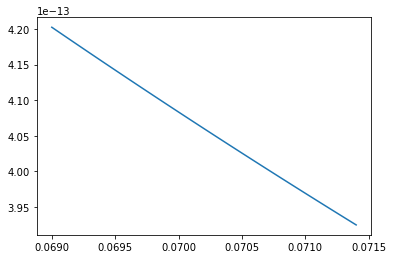

In [13]:
coord = (199, 199)
amp = amp_matrix[coord]
freq = freq_matrix[coord]
qual = qual_matrix[coord]
def amp_func_from_case(frequency, max_amplitude, w_0, quality):
    return ((max_amplitude * w_0**2 / quality) /
            np.sqrt((w_0**2 - frequency**2)**2 + (w_0 * frequency / quality)**2))
freq_pars = np.arange(0.0690,0.0715,0.0001)
fitted_amp = [amp_func_from_case(x, amp, freq, qual) for x in freq_pars]
print(fitted_amp[6])
plt.plot(freq_pars, fitted_amp)